In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=c5c4bd5b0dac562a42604b017e5a4b91d22c92ae2de8a3ec7737a8830cfd351b
  Stored in directory: c:\users\jorge\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [35]:
import cv2
import imutils
from matplotlib import pyplot as plt
import gdown as gdown
import os

In [4]:
url =  'https://drive.google.com/file/d/1b3ireRk1lB40Qnl36UsvUGVLzwwlaL6W/view?usp=sharing'
output = 'hand.jpg'
gdown.download(url, output, quiet=False)

C:\Users\Jorge\anaconda3\lib\site-packages\gdown\parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1b3ireRk1lB40Qnl36UsvUGVLzwwlaL6W
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1b3ireRk1lB40Qnl36UsvUGVLzwwlaL6W/view?usp=sharing
To: C:\Users\Jorge\AI\ai_project5\hand.jpg
1.90MB [00:00, 2.87MB/s]


'hand.jpg'

/Users/alessiayi/Documents/Github/Utec/ai_project5
(23, 16)


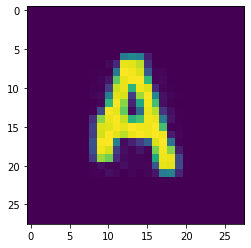

(20, 15)


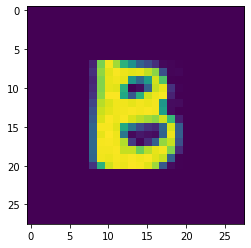

(20, 17)


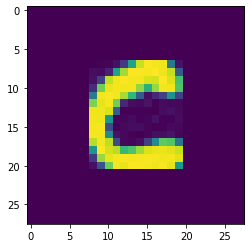

(22, 19)


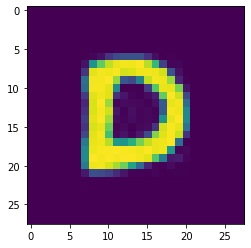

(17, 13)


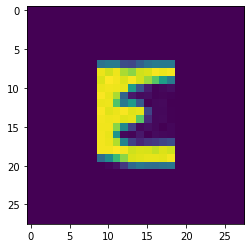

(3, 7)


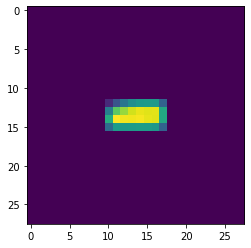

(18, 13)


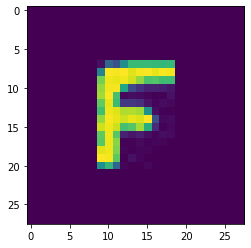

(20, 14)


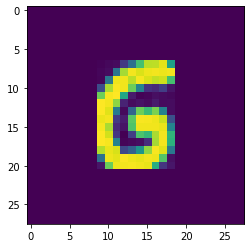

(21, 18)


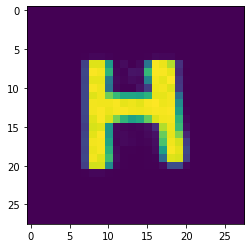

(17, 9)


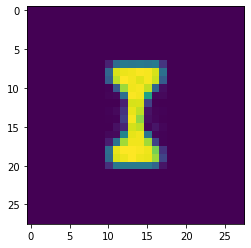

(18, 9)


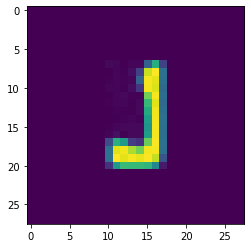

(20, 14)


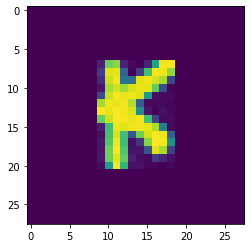

12


In [50]:
PATH = os.getcwd()
print(PATH)
img = cv2.imread(PATH + '/abc.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
mask = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
conts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
boxes = []
for cntr in conts:
    x,y,w,h = cv2.boundingRect(cntr)
    boxes.append((x,y,w,h))

boxes = sorted(boxes, key=lambda x: (x))

images = []
for i in boxes:
    x = i[0]
    y = i[1]
    w = i[2]
    h = i[3]
    cropped = gray[y:y+h, x:x+w]
    inverted = 255 - cropped
    print(inverted.shape)
    height = inverted.shape[0]
    width = inverted.shape[1]
    if (height > width):
        diff = height - width
        padding = cv2.copyMakeBorder(inverted,10,10,10+int(diff/2),10+int(diff/2),cv2.BORDER_CONSTANT,value=[0,0,0])
    elif (height == width):
        padding = cv2.copyMakeBorder(inverted,10,10,10,10,cv2.BORDER_CONSTANT,value=[0,0,0])
    else:
        diff = width - height
        padding = cv2.copyMakeBorder(inverted,10+int(diff/2),10+int(diff/2),10,10,cv2.BORDER_CONSTANT,value=[0,0,0])
    resized = cv2.resize(padding, (28, 28))
    images.append(resized)    
    plt.imshow(resized)
    plt.show()
print(len(images))


In [37]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import gdown as gdown
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
from torchvision.transforms.transforms import Normalize

In [38]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [26]:
PATH

'C:\\Users\\Jorge\\AI\\ai_project5'

In [40]:
model = torch.load(PATH + '/AlexNet.pt', map_location=torch.device('cpu'))
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (13): AdaptiveAvgPool2d(output_size=(6, 6))
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=2048, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(i

In [39]:
class Lenet5(nn.Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.AdaptiveAvgPool2d(output_size=(5, 5))
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.1, inplace = False),
            nn.Linear(in_features=400, out_features=100, bias=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.1, inplace = False),
            nn.Linear(in_features=100, out_features=26, bias=True),
         )
        
    def forward(self, image):
        out = self.features(image)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

In [29]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace = True),
            nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace = True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False),
            nn.AdaptiveAvgPool2d(output_size=(6, 6))
        )
        self.classifier = nn.Sequential(
            #nn.Dropout(p=0.1, inplace = False),
            nn.Linear(in_features=9216, out_features=2048, bias=True),
            nn.ReLU(inplace = True),
            #nn.Dropout(p=0.1, inplace = False),
            nn.Linear(in_features=2048, out_features=512, bias=True),
            nn.ReLU(inplace = True),
            nn.Linear(in_features=512, out_features=26, bias=True)
         )

    def forward(self, image):
        out = self.features(image)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

In [49]:
transformToTensor = transforms.ToTensor()
image = transformToTensor(np.array(images[0]))

img_set = []
for i in images:
    img_set.append((transformToTensor(i), 0))
loader = torch.utils.data.DataLoader(dataset=img_set, batch_size=1, shuffle=True)
transform = transforms.ToPILImage()
model = model.to('cpu')
image = image.to('cpu')
for a, b in loader:
    img1 = transform(a[0])
    img1.show()
    label_batch_pred = model(a)
    _, predicted = torch.max(label_batch_pred.data, 1)
    print(predicted)
    break

tensor([4])
